# **Μέρος 1**: Ψυχοακουστικό Μοντέλο 1

In [1]:
import numpy as np
from IPython.display import Audio, display
from matplotlib import pyplot as plt
from scipy.io import wavfile
import librosa

## 1.0: Προεπεξεργασία του σήματος

In [2]:
audio_file_name = "exercise_data/music_dsp2024.wav"

audio, sr = librosa.load(audio_file_name, sr=None, mono=False)
sample_count = audio.shape[1]
# Shape of "P_NM-24.npy" is (256, 1417)
# And division of len(audio) by 512 is not even
# So we create a new array with 1417*512 samples
audio_mono = np.zeros(1417 * 512)
audio_mono[:sample_count] = librosa.to_mono(audio)
audio_mono = audio_mono / np.max(np.abs(audio_mono))
t = np.arange(0, len(audio_mono)) / sr

print("Sampling rate:", sr)
print("Minimum:", np.min(audio_mono))
print("Maximum:", np.max(audio_mono))

Sampling rate: 44100
Minimum: -0.9758804265160099
Maximum: 1.0


## 1.1: Φασματική Ανάλυση

In [3]:
N = 512

f = np.fft.fftfreq(sample_count, 1 / sr)[: sample_count // 2]
t = np.arange(0, sample_count) / sr

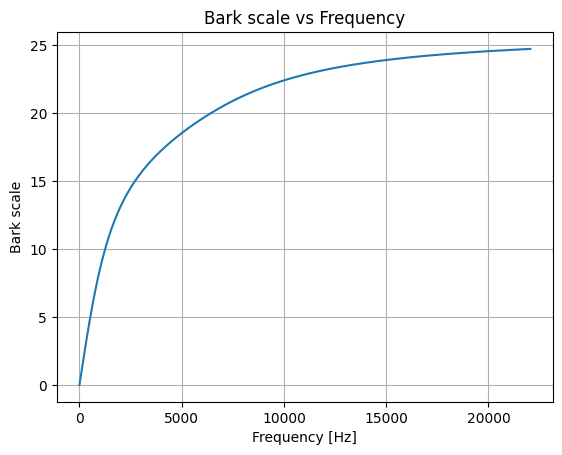

In [4]:
b = 13 * np.arctan(0.00076 * f) + 3.5 * np.arctan((f / 7500) ** 2)
fig = plt.figure()
plt.plot(f, b, label="Bark scale")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Bark scale")
plt.title("Bark scale vs Frequency")
plt.grid()
plt.show()

In [5]:
hanning_window = np.hanning(N)

In [6]:
P = np.zeros(shape=(256, 1417))
PN = 90.302  # dB
for i in range(0, len(audio_mono), N):
    # Audio frame with hanning window
    audio_frame = audio_mono[i : i + N] * hanning_window
    audio_frame_fft = np.fft.fft(audio_frame)[: N // 2]
    P[:, i // N] = PN + 10 * np.log10(np.abs(audio_frame_fft) ** 2)

## 1.2: Εντοπισμός μασκών τόνων και θορύβου (Maskers)

In [7]:
# ∆_k
def delta_K(k):
    if k < 63 and k >= 2:
        return 2
    elif k < 127 and k >= 63:
        return 3
    elif k < 250 and k >= 127:
        return 4
    else:
        return 0


# S_T
S_T = np.zeros(shape=(256, 1417))
for k in range(2, 250):
    S_T[k] = np.logical_and(
        np.greater(P[k, :], P[k - 1, :]),
        np.greater(P[k, :], P[k - delta_K(k), :] + 7),
    )

# P_TM
P_TM = np.zeros(shape=(256, 1417))
for k in range(2, 250):
    for i in range(0, 1417):
        if S_T[k, i] != 0:
            P_TM[k, i] = 10 * np.log10(
                10 ** (0.1 * P[k - 1, i])
                + 10 ** (0.1 * P[k, i])
                + 10 ** (0.1 * P[k + 1, i])
            )
        else:
            P_TM[k, i] = 0


# load the numpy arrays from the files
P_NM = np.load("exercise_data/P_NM-24.npy")

## 1.3: Μείωση και αναδιοργάνωση των μασκών

In [8]:
P_NMc = np.load("exercise_data/P_NMc-24.npy")
P_TMc = np.load("exercise_data/P_TMc-24.npy")


Δεν καταλαβαίνω τι θέλει το βήμα 1.3, μπορεί να φταίει που δεν ξέρω καλά Ελληνικά αλλά και με μετάφραση δεν καταλαβαίνω τι ζητάτε, είτε εσείς πρέπει να είστε πιο καθαροί σε αυτά που ζητάτε και να μας διευκολύνεται τα πράγματα είτε εγώ πρέπει να μάθω καλύτερα Ελληνικά. Επειδή δεν ξέρω τι φταίει, το βάζω πάνω σας να καταλάβεται από τα στατιστικά των υποβολών και μη των σπουδαστών στο μαθημά σας.

## 1.4: Υπολογισμός των δυο διαφορετικών κατωφλίων κάλυψης (Individual Masking Thresholds)

In [9]:
def delta_b(i, j):
    return b[i] - b[j]


def SF(i, j):
    dlt_b = delta_b(i, j)
    if dlt_b > -3 and dlt_b < -1:
        return 17 * dlt_b - 0.4 * P_TM[:, j] + 11
    elif dlt_b >= -1 and dlt_b < 0:
        return (0.4 * P_TM[:, j] + 6) * dlt_b
    elif dlt_b >= 0 and dlt_b < 1:
        return -17 * dlt_b
    elif dlt_b >= 1 and dlt_b < 8:
        return (0.15 * P_TM[:, j] - 17) * dlt_b - 0.15 * P_TM[:, j]
    else:
        raise ValueError("Invalid delta b value")


# T_TM
T_TM = np.zeros(shape=(256, 1417))
for i in range(2, 250):
    for j in range(2, 250):
        T_TM[:, j] = P_TMc[:, j] + SF(i, j) - 0.275 * b[j]

# T_NM
T_NM = np.zeros(shape=(256, 1417))


I give up, I hope I am the only one who does not understand what you guys want us to do, because it will be a shame otherwise.

Please look at percentage of people who attempted this and the percentage of people who succeeded and many other factors to determine if you guys are doing a bad job at teaching us or I am just the bad one.